In [1]:
import numpy as np

### Linear Regression

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) 

In [3]:
import matplotlib.pyplot as plt

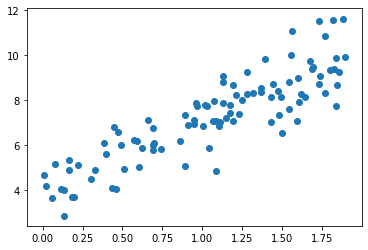

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
X_b = np.c_[np.ones(X.shape), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.99149744],
       [3.09233665]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 3.99149744],
       [10.17617075]])

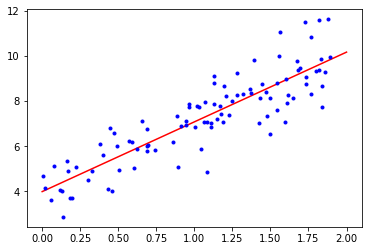

In [8]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99149744]), array([[3.09233665]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.99149744],
       [10.17617075]])

In [12]:
# implementation of gradient decent
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for i in range(n_iterations):
    gradients = (2 / m) * (X_b.T.dot(X_b.dot(theta) - y))
    theta = theta - eta * gradients
    
theta

array([[3.99149744],
       [3.09233665]])

In [13]:
# implementation of SGD
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        eta = learning_schedule(epoch*m + i)
        gradients = 2 * x_i.T.dot((x_i.dot(theta) - y_i))
        theta = theta - eta * gradients

In [14]:
theta

array([[4.00523929],
       [3.03006232]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01894576]), array([3.22600163]))

### Polynomial Regression

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

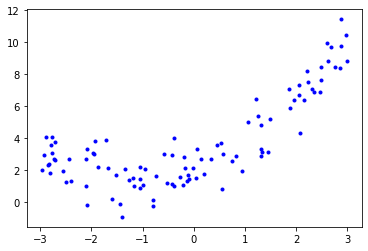

In [18]:
plt.plot(X, y, 'b.')
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [20]:
X[0]

array([2.06302918])

In [21]:
X_poly[0]

array([2.06302918, 4.25608939])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lin_reg.intercept_, lin_reg.coef_

(array([2.03033814]), array([[1.12776391, 0.51800495]]))

### Learning Curve

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    train_errors, val_errors = [], []
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_pred, y_val))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train error')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val error')

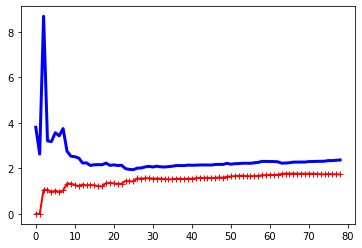

In [25]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

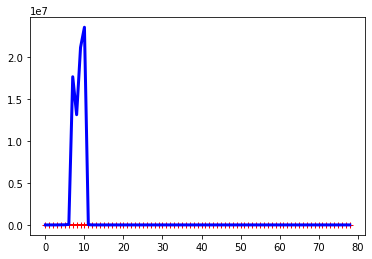

In [26]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curve(polynomial_regression, X, y)

### Rugularized Regression

In [27]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.4336786]])

In [28]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.43579254])

In [29]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.39088725])

In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.38913706])

In [48]:
# Looks like stop earlier does not work any more because of not fit yet error
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scale_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scale', StandardScaler())
])

X_poly_scaled = poly_scale_pipeline.fit_transform(X)
X_train_poly_scaled, X_val_poly_scaled, y_train, y_val = train_test_split(X_poly_scaled, y, test_size=0.2)
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
min_val_error = float('inf')
best_epoch = None
best_model = None

for i in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_err = mean_squared_error(y_val_pred, y_val)
    if val_err < min_val_error:
        min_val_error = val_err
        best_epoch = i
        best_model = clone(sgd_reg)

/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/

/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/py37/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/sean/venv/

### Logistic Regression

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [51]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

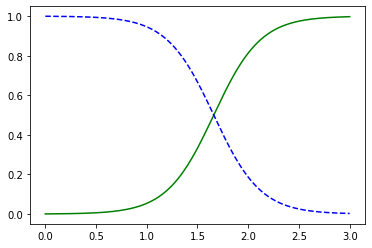

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')

In [55]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

In [56]:
X = iris['data'][:, (2, 3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
softmax_reg.predict([[5, 2]])

array([2])

In [59]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])